In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import re
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer 


from models.text.nb import multinomialNaiveBayes
from models.text.svm import svm

from helper.helper import confusionMatrixHeatmap



[nltk_data] Downloading package stopwords to /home/tony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tony/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('./dataset/books-listing-train.csv')
df_test = pd.read_csv('./dataset/books-listing-test.csv')


In [3]:
df.head()

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Category ID,Category
0,1620651572,1620651572.jpg,http://ecx.images-amazon.com/images/I/41pZpWE4...,Jonathan Toews (Hockey Superstars),Brenda Haugen,4,Children's Books
1,764147978,0764147978.jpg,http://ecx.images-amazon.com/images/I/51O9MxuG...,Presidential Elections and Other Cool Facts,Syl Sobel J.D.,4,Children's Books
2,1842297406,1842297406.jpg,http://ecx.images-amazon.com/images/I/61GDVJ6B...,How to Draw 101 Animals,NaN,4,Children's Books
3,1603093338,1603093338.jpg,http://ecx.images-amazon.com/images/I/51E15yIL...,Martin Luther King and the Montgomery Story,Alfred Hassler,4,Children's Books
4,316301191,0316301191.jpg,http://ecx.images-amazon.com/images/I/61lOcW9d...,"Monster High: Boo York, Boo York: The Junior N...",Mattel,4,Children's Books


In [4]:
df['Category'].value_counts()

Category
Children's Books             1080
Comics & Graphic Novels      1080
Computers & Technology       1080
Cookbooks, Food & Wine       1080
Romance                      1080
Science & Math               1080
Science Fiction & Fantasy    1080
Sports & Outdoors            1080
Test Preparation             1080
Travel                       1080
Name: count, dtype: int64

In [5]:
df_test['Category'].value_counts()

Category
Children's Books             120
Comics & Graphic Novels      120
Computers & Technology       120
Cookbooks, Food & Wine       120
Romance                      120
Science & Math               120
Science Fiction & Fantasy    120
Sports & Outdoors            120
Test Preparation             120
Travel                       120
Name: count, dtype: int64

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amazon ID (ASIN)  1200 non-null   object
 1   Filename          1200 non-null   object
 2   Image URL         1200 non-null   object
 3   Title             1200 non-null   object
 4   Author            1143 non-null   object
 5   Category ID       1200 non-null   int64 
 6   Category          1200 non-null   object
dtypes: int64(1), object(6)
memory usage: 65.8+ KB


In [7]:
df.drop(['Amazon ID (ASIN)','Filename','Image URL'],axis=1,inplace=True)
df_test.drop(['Amazon ID (ASIN)','Filename','Image URL'],axis=1,inplace=True)

In [8]:
def review_to_words(raw_review): 
    review = raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))


In [9]:
corpus= []
for i in range(0, 10800):
    corpus.append(review_to_words(df['Title'][i]))

In [10]:
corpus_test= []
for i in range(0, 1200):
    corpus_test.append(review_to_words(df_test['Title'][i]))

In [11]:
df['new_Title']=corpus

In [12]:
df.head()

,Title,Author,Category ID,Category,new_Title
0,Jonathan Toews (Hockey Superstars),Brenda Haugen,4,Children's Books,jonathan toews hockey superstar
1,Presidential Elections and Other Cool Facts,Syl Sobel J.D.,4,Children's Books,presidential election cool fact
2,How to Draw 101 Animals,NaN,4,Children's Books,draw animal
3,Martin Luther King and the Montgomery Story,Alfred Hassler,4,Children's Books,martin luther king montgomery story
4,"Monster High: Boo York, Boo York: The Junior N...",Mattel,4,Children's Books,monster high boo york boo york junior novel


# Wordcloud show most usage words

In [35]:
wordCloudList= []

In [14]:
def generateWordCloud(split_word):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)
    wordCloudList.append(np.array(wordcloud))

In [15]:
df['Category'].unique()

array(["Children's Books", 'Comics & Graphic Novels',
       'Computers & Technology', 'Cookbooks, Food & Wine', 'Romance',
       'Science & Math', 'Science Fiction & Fantasy', 'Sports & Outdoors',
       'Test Preparation', 'Travel'], dtype=object)

In [17]:
# len(wordCloudList)

In [ ]:
for i in df['Category'].unique():
    category=df[df['Category']==i]
    words = ' '.join(category['new_Title'])
    split_word = " ".join([word for word in words.split()])
    generateWordCloud(split_word)


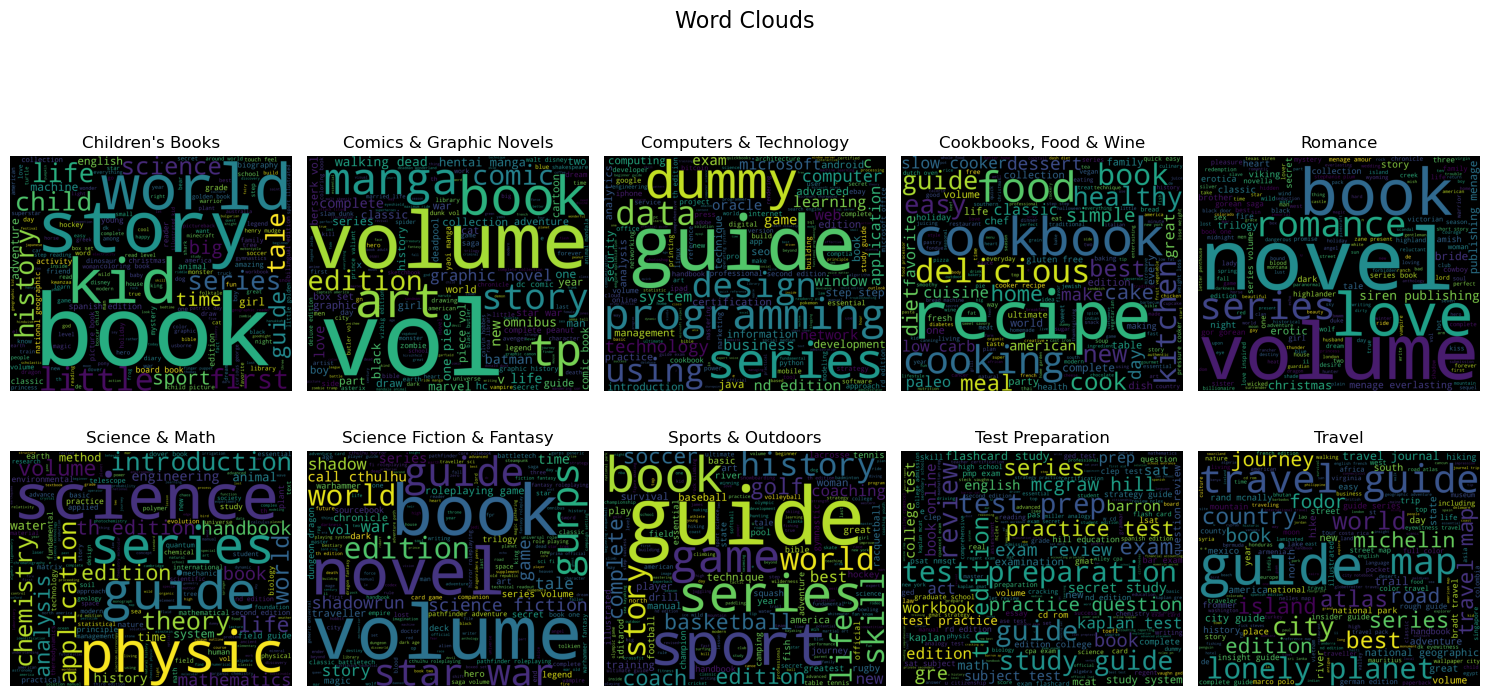

In [ ]:
# plt.figure(1,figsize=(13, 13))
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Word Clouds', fontsize=16)

for i, ax in enumerate(axes.flat):

# for i in range(2):    
    ax.imshow(wordCloudList[i])
    ax.set_title(df['Category'].unique()[i])
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
plt.savefig("wordcloud.png")


# Count every words

In [19]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 

In [20]:
title_data = df['new_Title']

In [21]:
title_data_words = vectorizer.fit_transform(title_data)

In [22]:
title_data_words = title_data_words.toarray()

In [23]:
title_data= vectorizer.get_feature_names_out()

In [24]:
title_data

array(['abc', 'absolute', 'academic', ..., 'zero', 'zombie', 'zone'],
      dtype=object)

In [25]:
print (title_data_words.shape)


(10800, 2000)


In [26]:
dist = np.sum(title_data_words, axis=0)
for tag, count in zip(title_data, dist):
    print (tag,count) 

abc 8
absolute 7
academic 17
academy 12
accepted 8
access 30
accidental 6
account 8
accounting 27
ace 11
achieve 6
act 65
action 21
active 7
activity 31
actual 9
adaptive 10
administration 16
administrator 9
admission 29
adobe 13
adult 20
advance 14
advanced 85
adventure 124
advice 10
affair 9
africa 21
african 13
age 49
agent 10
agile 9
agriculture 8
aid 14
air 20
al 7
alaska 14
alaskan 8
algebra 32
algeria 7
algorithm 16
alice 11
alien 17
alkaloid 10
along 10
alpine 6
amazing 30
amazon 17
america 92
american 114
amish 18
among 18
amour 9
analogy 17
analysis 67
analytics 22
anatomy 11
ancient 34
andorra 6
android 23
angel 15
angeles 7
animal 60
animation 6
anna 6
anne 6
anniversary 14
answer 29
anthology 14
antigua 7
anyone 7
ap 41
apache 7
apocalypse 10
app 10
appalachian 7
appetizer 6
apple 14
application 97
applied 23
approach 50
apps 13
aptitude 9
arab 7
arabia 9
archery 8
architecture 19
arco 6
area 21
arizona 7
arm 6
armenia 11
army 8
around 25
arrow 7
art 143
arthur 13
artist 1

In [27]:
title_new = pd.DataFrame(dist)

In [28]:
title_new.columns=['word_count']

In [29]:
title_new['word'] = pd.Series(title_data, index=title_new.index)

In [30]:
title_new1=title_new[['word','word_count']]

In [31]:
title_new1.head()

,word,word_count
0,abc,8
1,absolute,7
2,academic,17
3,academy,12
4,accepted,8


In [32]:
top_30_words=title_new1.sort_values(['word_count'],ascending=[0])

In [33]:
top_30_words.head(30)

,word,word_count
806,guide,1232
557,edition,816
196,book,795
1911,volume,562
1782,test,498
1589,series,488
1472,recipe,448
1909,vol,361
615,exam,335
1214,new,288


# Train


In [13]:
cv = CountVectorizer()
x_train = cv.fit_transform(corpus).toarray()
x_test = cv.transform(corpus_test).toarray()
y_train = df['Category'].values
y_test = df_test['Category'].values


In [14]:
# target = df['Category'].values
# target1 = df_test['Category'].values

# X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2, random_state=42)


In [15]:
nb = multinomialNaiveBayes(x_train, x_test, y_train, y_test)

In [16]:
print(f"Accuracy: {nb[0]}")

Accuracy: 0.7291666666666666


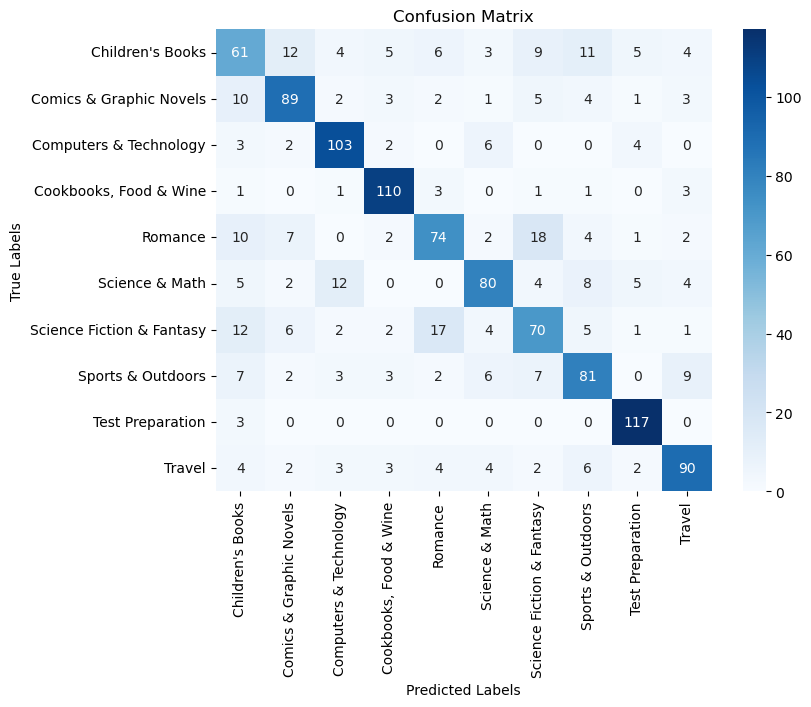

In [17]:
confusionMatrixHeatmap(nb[1], df['Category'].unique())

In [18]:
svm = svm(x_train, x_test, y_train, y_test)

In [19]:
print(f"Accuracy: {svm[0]}")

Accuracy: 0.6808333333333333


In [20]:
# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()
# classifier.fit(X_train, y_train)

# y_pred = classifier.predict(X_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [21]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # accuracy_real = accuracy_score(y_test, y_real_pred)
# # print(f"Accuracy: {accuracy_real}")

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# # print("Confusion Matrix:")
# # print(cm)

# # Classification Report
# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)